In [5]:
pip install pandas numpy nltk scikit-learn matplotlib seaborn wordcloud



   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 330.3 kB/s eta 0:00:01
   ------ -------------------------------- 51.2/301.2 kB 440.4 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.2 kB 845.5 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.0 MB/s eta 0:00:00


In [132]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [39]:

pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [43]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [45]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
fb = pd.read_csv(r"C:\Users\ratna\Downloads\fb_sentiment.csv")

Exploring Data

In [60]:
fb.head()

,Unnamed: 0,FBPost,Label
0,0,Drug Runners and a U.S. Senator have somethin...,O
1,1,"Heres a single, to add, to Kindle. Just read t...",O
2,2,If you tire of Non-Fiction.. Check out http://...,O
3,3,Ghost of Round Island is supposedly nonfiction.,O
4,4,Why is Barnes and Nobles version of the Kindle...,N


In [62]:
# lower-casing the coloumn names
fb.columns = map(str.lower, fb.columns)

In [64]:
# checkin the shape of the DF
fb.shape

(1000, 3)

Data preperation

In [72]:
import re

# Lowercasing the text
fb['fbpost'] = fb['fbpost'].apply(lambda x: x.lower())

# Removing symbols using RegEx
fb['fbpost'] = fb['fbpost'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))


In [ ]:
With this Neural network, we want to predict, whether a comment is Positive (P) or Negative (N), so the comments with the sentiment labeled Other (O) 
is of no use to us, so it's removed from the dataset.

In [74]:
fb = fb[fb.label != "O"]

In [ ]:
Now to tokenize the actual Facebook comments:

In [76]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(fb['fbpost'].values)
X = tokenizer.texts_to_sequences(fb['fbpost'].values)
X = pad_sequences(X)

In [ ]:
Preparing the labels

Here the lables are checked after the removel of the "other" sentimented comments. Also some preperation to the algorithm, as preparing the test-, 
and training sets are done.

In [78]:
fb.label.value_counts()

label
P    641
N     79
Name: count, dtype: int64

In [80]:
Y = pd.get_dummies(fb['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(482, 203) (482, 2)
(238, 203) (238, 2)


In [ ]:
The Neural Network
In this section, the algorithm is prepared with following features:

The model is Sequential
The model type is an LSTM model

In [110]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Hyperparameters
max_features = 10000  # Vocabulary size (e.g., 10,000 unique tokens)
embed_dim = 200       # Embedding dimensions
lstm_out = 200        # Number of LSTM units
sequence_length = 203  # Length of input sequences (number of tokens)

# Example Data (for illustration purposes)
X = np.random.randint(1, max_features, (1000, sequence_length))  # Random example data
y = np.random.randint(2, size=(1000, 1))  # Random binary classification labels

# Convert labels to categorical (for categorical crossentropy loss)
y = to_categorical(y, num_classes=2)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()

# Add embedding layer: input_dim=max_features (vocabulary size), output_dim=embed_dim
model.add(Embedding(input_dim=max_features, output_dim=embed_dim, input_length=sequence_length))

# Add dropout to avoid overfitting
model.add(SpatialDropout1D(0.4))

# Add LSTM layer: lstm_out is the number of units in the LSTM
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))

# Output layer for binary classification
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train the model (example training)
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


C:\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_10            │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - accuracy: 0.4821 - loss: 0.6938 - val_accuracy: 0.5300 - val_loss: 0.6928
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.7661 - loss: 0.6671 - val_accuracy: 0.5100 - val_loss: 0.6992
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 349ms/step - accuracy: 0.8921 - loss: 0.4624 - val_accuracy: 0.5000 - val_loss: 0.7239
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.9834 - loss: 0.1912 - val_accuracy: 0.4750 - val_loss: 0.9105
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.9821 - loss: 0.1058 - val_accuracy: 0.5100 - val_loss: 0.8689
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4962 - loss: 0.9088
Validation Loss: 0.8688697814941406
Validation Accuracy: 0.5099999904632568


In [114]:
print(X_train.shape)
print(Y_train.shape)


(800, 203)
(482, 2)


Epoch 1/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 1.0000 - loss: 0.0251 - val_accuracy: 0.5250 - val_loss: 1.0527
Epoch 2/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.9999 - loss: 0.0041 - val_accuracy: 0.5000 - val_loss: 1.2883
Epoch 3/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.4900 - val_loss: 1.3005
Epoch 4/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.4850 - val_loss: 1.3785
Epoch 5/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 1.0000 - loss: 7.0813e-04 - val_accuracy: 0.4800 - val_loss: 1.4580
Epoch 6/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 1.0000 - loss: 5.6789e-04 - val_accuracy: 0.4800 - val_loss: 1.5318
Epoch 7/7
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 1.0000 - loss: 5.0800e-04 - val_accuracy: 0.4850 - val_loss: 1.6085


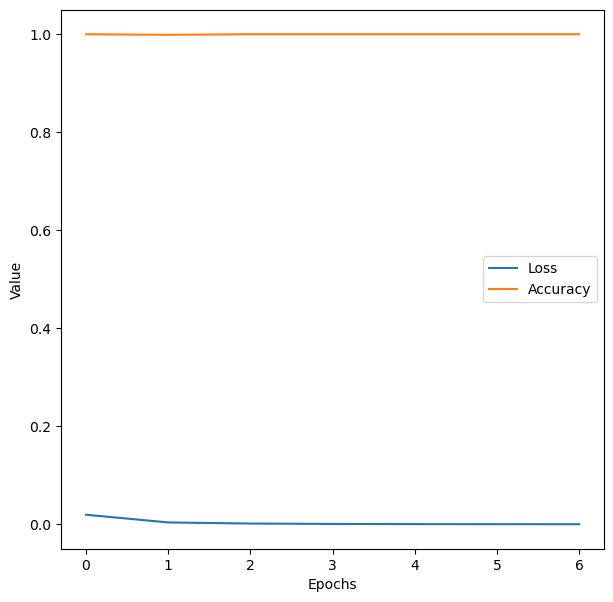

In [120]:
# Assuming you have a model `model` and training data `X_train`, `y_train`
hist = model.fit(X_train, y_train, epochs=7, validation_data=(X_val, y_val))

# Now you can use hist.history
history = pd.DataFrame(hist.history)

# Plotting accuracy and loss
plt.figure(figsize=(7,7))
plt.plot(history["loss"], label="Loss")
plt.plot(history["accuracy"], label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.show()


In [122]:
#Testing the model, and retrieveing score and accuracy:
score,acc = model.evaluate(X_test,Y_test)
print("score: %.2f" % (score))
print("accuracy: %.2f" % (acc))

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6149 - loss: 1.4051
score: 1.33
accuracy: 0.61


In [126]:
#now we validate for the models accuracy in predicting either a positive, or a negative score:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
x_test = X_test[:-validation_size]
y_test = Y_test[:-validation_size]

In [128]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    result = model.predict(X_validate[x].reshape(1,x_test.shape[1]),verbose = 2)[0]
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1
print("positive_acc", pos_correct/pos_cnt*100, "%")
print("negative_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 374ms/step
1/1 - 0s - 50ms/step
1/1 - 0s - 40ms/step
1/1 - 0s - 34ms/step
1/1 - 0s - 41ms/step
1/1 - 0s - 35ms/step
1/1 - 0s - 41ms/step
1/1 - 0s - 49ms/step
1/1 - 0s - 42ms/step
1/1 - 0s - 49ms/step
1/1 - 0s - 36ms/step
1/1 - 0s - 50ms/step
1/1 - 0s - 48ms/step
1/1 - 0s - 40ms/step
1/1 - 0s - 44ms/step
1/1 - 0s - 42ms/step
1/1 - 0s - 35ms/step
1/1 - 0s - 45ms/step
1/1 - 0s - 38ms/step
1/1 - 0s - 39ms/step
1/1 - 0s - 48ms/step
1/1 - 0s - 37ms/step
1/1 - 0s - 33ms/step
1/1 - 0s - 42ms/step
1/1 - 0s - 32ms/step
1/1 - 0s - 46ms/step
1/1 - 0s - 36ms/step
1/1 - 0s - 33ms/step
1/1 - 0s - 34ms/step
1/1 - 0s - 45ms/step
1/1 - 0s - 36ms/step
1/1 - 0s - 51ms/step
1/1 - 0s - 49ms/step
1/1 - 0s - 32ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 47ms/step
1/1 - 0s - 44ms/step
1/1 - 0s - 49ms/step
1/1 - 0s - 39ms/step
1/1 - 0s - 26ms/step
1/1 - 0s - 53ms/step
1/1 - 0s - 40ms/step
1/1 - 0s - 24ms/step
1/1 - 0s - 32ms/step
1/1 - 0s - 31ms/step
1/1 - 0s - 50ms/step
1/1 - 0s - 41ms/step
1/1 - 0s - 3

In [130]:
#now testing  on a random sample from the Facebook comments on Kindle's page:
cmnt = ['your customer service is the absolute worst i now have a mess of books on my kindle']
#vectorizing the comment
cmnt = tokenizer.texts_to_sequences(cmnt)
cmnt = pad_sequences(cmnt, maxlen=203, dtype='int32', value=0)
print(cmnt)
sentiment = model.predict(cmnt,batch_size=2,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0  51 510 674  12   2 895   1  69  11   6
   13  16  20   3   4]]
1/1 - 0s - 41ms/step
positive


In [ ]:
What went wrong?

Our sample size for the training-, and test set was in fact quite small (under 1000 comments), and the proportion of negative to positive comments 
was skewed about 1 to 9. So the algorithm was not really optimized on the basis of our data. This is the reason for the algorithm choosing the wrong 
sentiment in the sample-test above.